In [3]:
import torchaudio

import IPython
import matplotlib.pyplot as plt

# Additive noise

In [4]:
from wavencoder.transforms import AdditiveNoise

add = AdditiveNoise('/home/shangeth/Downloads/Dataset/DLIVING_16k/DLIVING')
audio, _ = torchaudio.load('/home/shangeth/Downloads/Dataset/TIMIT/Wav_Data/TRAIN/FAEM0_SA2.WAV')

noisy = add(audio)
audio.shape, noisy.shape

(torch.Size([1, 45261]), torch.Size([1, 45261]))

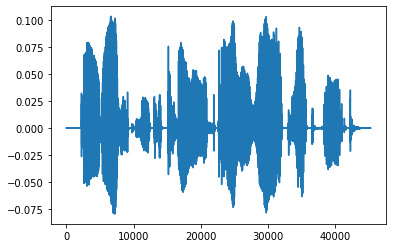

In [5]:
plt.plot(audio.reshape(-1))
plt.show()

IPython.display.Audio(audio.reshape(-1), rate=16000)

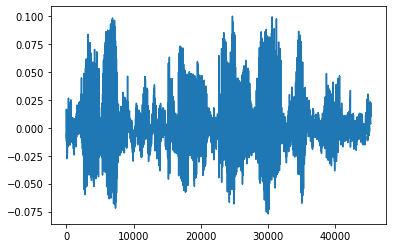

In [6]:
plt.plot(noisy.reshape(-1))
plt.show()

IPython.display.Audio(noisy.reshape(-1), rate=16000)

# Speed

In [7]:
from wavencoder.transforms import SpeedChange

speed = SpeedChange(factor_range=(-0.9, 0.0))
audio, _ = torchaudio.load('/home/shangeth/Downloads/Dataset/TIMIT/Wav_Data/TRAIN/FAEM0_SA2.WAV')

speedy = speed(audio)

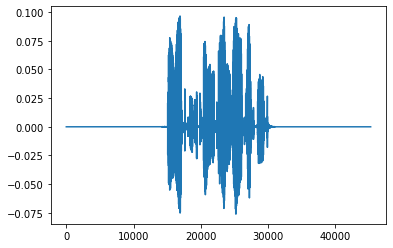

In [8]:
plt.plot(speedy.reshape(-1))
plt.show()

IPython.display.Audio(speedy.reshape(-1), rate=16000)

# Clipping

In [9]:
from wavencoder.transforms import Clipping

clip = Clipping()
audio, _ = torchaudio.load('/home/shangeth/Downloads/Dataset/TIMIT/Wav_Data/TRAIN/FAEM0_SA2.WAV')

clipped = clip(audio)

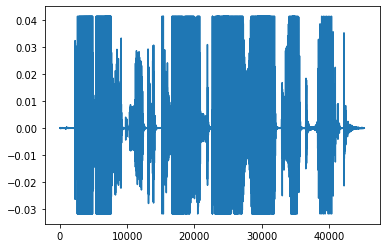

In [11]:

plt.plot(clipped.reshape(-1))
plt.show()

IPython.display.Audio(clipped.reshape(-1), rate=16000)

# Compose

In [12]:
from wavencoder.transforms import Compose, AdditiveNoise, SpeedChange, Clipping
import torchaudio

audio, _ = torchaudio.load('/home/shangeth/Downloads/Dataset/TIMIT/Wav_Data/TRAIN/FAEM0_SA2.WAV')

transforms = Compose([AdditiveNoise('/home/shangeth/Downloads/Dataset/DLIVING_16k/DLIVING'),
                     SpeedChange(factor_range=(-0.5, 0.0)),
                     Clipping()])

transformed_audio = transforms(audio)

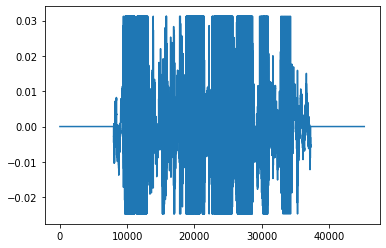

In [13]:
import IPython
import matplotlib.pyplot as plt

plt.plot(transformed_audio.reshape(-1))
plt.show()

IPython.display.Audio(transformed_audio.reshape(-1), rate=16000)